In [1]:
#Twitter OAuth and text analysis
import sys
import tokeninfo
from textblob import TextBlob
import tweepy
import re
import datetime
#Data Cleaning and Visualization
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
#ML Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
#pull token info from separate file
ckey = tokeninfo.capikey
csec = tokeninfo.capisec
akey = tokeninfo.accstok
asec = tokeninfo.accssec

In [3]:
auth = tweepy.OAuthHandler(ckey, csec)
auth.set_access_token(akey, asec)
api = tweepy.API(auth)

In [4]:
driltweets = [['Timestamp', 'Full_Text', 'Favorites', 'Retweets']]
for tweet in tweepy.Cursor(api.user_timeline, q='github -filter:retweets',screen_name='dril',  tweet_mode='extended').items(4000):
    tweettext = str(tweet.full_text)
    if not tweet.in_reply_to_status_id and not tweettext.startswith('RT @'):
        driltweets.append([tweet.created_at, tweet.full_text, tweet.favorite_count, tweet.retweet_count])

In [5]:
driltweets

[['Timestamp', 'Full_Text', 'Favorites', 'Retweets'],
 [datetime.datetime(2019, 3, 26, 17, 14, 21),
  '"Feel as though ive evolved beyond the need for Product, and now crave the Customer Experience"\nHubert Joly: Boy have I got the shit for you',
  3980,
  434],
 [datetime.datetime(2019, 3, 26, 17, 5, 17),
  'it fucking Sucks when a store sells me shit\nhttps://t.co/OZBhvWs87p',
  19607,
  2125],
 [datetime.datetime(2019, 3, 26, 16, 34, 22),
  'you look like the tomb raider lady Lol\nMar 22\n\njust heard the news of jussie smollett. Feeling unsafe right now\n5s\n\nYou can no longer send m',
  7948,
  759],
 [datetime.datetime(2019, 3, 25, 3, 10, 38),
  'https://t.co/YriJp9Nwsx',
  4889,
  473],
 [datetime.datetime(2019, 3, 25, 0, 40, 52),
  'saying "WOW" out loud watching youtube guy\'s username spin around in 3d in the 20 second intro to his video, going Psycho watching this shit',
  35201,
  4527],
 [datetime.datetime(2019, 3, 23, 21, 11, 49),
  'there`s no job harder than that of th

In [6]:
data = pd.DataFrame(driltweets[1:],columns=driltweets[0])
data

,Timestamp,Full_Text,Favorites,Retweets
0,2019-03-26 17:14:21,"""Feel as though ive evolved beyond the need fo...",3980,434
1,2019-03-26 17:05:17,it fucking Sucks when a store sells me shit\nh...,19607,2125
2,2019-03-26 16:34:22,you look like the tomb raider lady Lol\nMar 22...,7948,759
3,2019-03-25 03:10:38,https://t.co/YriJp9Nwsx,4889,473
4,2019-03-25 00:40:52,"saying ""WOW"" out loud watching youtube guy's u...",35201,4527
5,2019-03-23 21:11:49,there`s no job harder than that of the Media P...,45697,7039
6,2019-03-23 20:50:49,oh forgive me for forgetting that youre too go...,14331,1383
7,2019-03-23 00:41:01,when the earths Magnetic Poles flip and everyo...,5796,509
8,2019-03-22 22:47:49,ME: I love shit that is Dunning-Kruger\nNY Tim...,4661,383
9,2019-03-21 01:59:30,https://t.co/MfB5ySwNlp,10358,1020


In [7]:
analysis = ([])
for tweet in data['Full_Text']:
    analysis.append(TextBlob(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())).sentiment.polarity)

In [8]:
for tweet in analysis:
    print(tweet)

-0.2
-0.25
0.5428571428571429
0.0
0.0
0.275
0.7
3.700743415417188e-17
0.42500000000000004
0.0
0.175
0.3666666666666667
-0.2
-0.2
0.0
-0.04500000000000004
0.0
-0.4
0.25
0.0
-0.4
0.7
0.0
0.0
0.3
0.0
0.925
0.1
0.0
0.0
0.5
0.15
0.275
0.475
0.1
0.0
0.0
0.35
-0.375
0.0
0.5
0.0
0.3
0.78
-0.4
-0.061904761904761914
0.0
0.0
0.0
-0.2
0.15
-0.012698412698412697
0.35
0.0
-0.1
0.0
0.15000000000000002
0.0
0.0
-0.15185185185185182
0.0
0.075
0.3333333333333333
0.0
0.0
0.0
0.0
0.0
-0.4
0.0
0.0
0.0
0.1
0.0
0.0
0.0
0.0
-0.2
0.0
-0.1
0.225
0.14285714285714285
-0.24166666666666667
-0.25
0.125
0.0
0.0
-0.009999999999999998
0.0
0.0
-0.1
0.0
0.13636363636363635
0.15
0.2
0.08333333333333333
0.25
0.0
0.0
-0.16666666666666666
-0.3
-0.0875
-0.28
-0.20000000000000004
-2.7755575615628914e-17
-0.3333333333333333
-0.21666666666666667
0.0
0.0
0.0
0.0
0.1
-0.4
-0.3
-0.18125
0.0
0.1
0.6
0.0
-0.07142857142857142
0.08333333333333333
0.15
0.0
0.0
0.2
0.0
-0.16666666666666666
0.0
-0.3
0.0
-0.1
0.20833333333333334
0.4
0.0
0.0

-0.7
-0.2380952380952381
0.0
0.3333333333333333
-0.2
0.425
0.08333333333333334
0.0
-0.1638888888888889
0.0
-0.2
-0.6333333333333333
0.0
0.7
-0.05
0.1285714285714286
-0.4
0.225
-0.15000000000000002
0.14045454545454544
-0.3166666666666667
0.0
-0.2833333333333333
0.15
0.13333333333333333
-0.35
0.0
0.195
0.7
0.31333333333333335
0.0
0.06666666666666667
0.1733333333333333
0.2814814814814815
0.25
0.0
0.0
0.6
0.0
0.0
0.09583333333333333
0.048148148148148134
-0.1
-0.4
0.033333333333333326
0.0
0.21249999999999997
0.0
0.43333333333333335
0.3375
0.0
-0.625
0.0
0.15
0.0
-0.2916666666666667
-0.5
0.0
0.4
-0.23465909090909093
0.0028409090909090884
0.0
0.0
0.0
0.0
0.7
0.0
0.0
0.3
0.0
0.15
-0.06666666666666667
0.0
0.0
0.0
0.0
0.0
-0.2833333333333333
0.0
-0.4
0.3888888888888889
-0.2
0.0
0.0
-0.25
0.0
-0.3
0.0
0.0
-0.4
0.0
-0.3333333333333333
0.0
-0.1851851851851852
0.2
-0.5
0.0
0.25
-0.2
0.0
-0.175
0.0
-0.8
-0.2
0.2
-0.10000000000000002
-0.5
0.32
-0.375
0.14285714285714285
0.7
0.4
-0.23611111111111108
-0

In [9]:
data['Sentiment'] = analysis
data

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,2019-03-26 17:14:21,"""Feel as though ive evolved beyond the need fo...",3980,434,-2.000000e-01
1,2019-03-26 17:05:17,it fucking Sucks when a store sells me shit\nh...,19607,2125,-2.500000e-01
2,2019-03-26 16:34:22,you look like the tomb raider lady Lol\nMar 22...,7948,759,5.428571e-01
3,2019-03-25 03:10:38,https://t.co/YriJp9Nwsx,4889,473,0.000000e+00
4,2019-03-25 00:40:52,"saying ""WOW"" out loud watching youtube guy's u...",35201,4527,0.000000e+00
5,2019-03-23 21:11:49,there`s no job harder than that of the Media P...,45697,7039,2.750000e-01
6,2019-03-23 20:50:49,oh forgive me for forgetting that youre too go...,14331,1383,7.000000e-01
7,2019-03-23 00:41:01,when the earths Magnetic Poles flip and everyo...,5796,509,3.700743e-17
8,2019-03-22 22:47:49,ME: I love shit that is Dunning-Kruger\nNY Tim...,4661,383,4.250000e-01
9,2019-03-21 01:59:30,https://t.co/MfB5ySwNlp,10358,1020,0.000000e+00


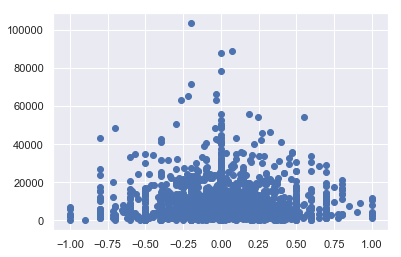

In [10]:
plt.scatter(data['Sentiment'], data['Favorites'])

In [11]:
data_day = data.copy()
time_weekdays = ([])
for time in data_day['Timestamp']:
    time_weekdays.append(time.weekday())
time_weekdays

[1,
 1,
 1,
 0,
 0,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 6,
 6,
 5,
 3,
 3,
 3,
 5,
 5,
 4,
 4,
 3,
 2,
 2,
 1,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 1,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 3,
 0,
 0,
 6,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 0,
 0,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 2,
 2,
 2,
 2,
 2,
 0,
 6,
 6,
 5,
 3,
 3,
 2,
 2,
 1,
 1,
 6,
 6,
 6,
 6,
 5,
 4,
 3,
 3,
 2,
 2,
 1,
 1,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 0,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 3,
 3,
 2,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 1,
 1,
 1,
 6,
 2,
 2,
 0,
 0,
 6,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 0,
 6,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,


In [12]:
data_day['Timestamp'] = time_weekdays
data_day

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,1,"""Feel as though ive evolved beyond the need fo...",3980,434,-2.000000e-01
1,1,it fucking Sucks when a store sells me shit\nh...,19607,2125,-2.500000e-01
2,1,you look like the tomb raider lady Lol\nMar 22...,7948,759,5.428571e-01
3,0,https://t.co/YriJp9Nwsx,4889,473,0.000000e+00
4,0,"saying ""WOW"" out loud watching youtube guy's u...",35201,4527,0.000000e+00
5,5,there`s no job harder than that of the Media P...,45697,7039,2.750000e-01
6,5,oh forgive me for forgetting that youre too go...,14331,1383,7.000000e-01
7,5,when the earths Magnetic Poles flip and everyo...,5796,509,3.700743e-17
8,4,ME: I love shit that is Dunning-Kruger\nNY Tim...,4661,383,4.250000e-01
9,3,https://t.co/MfB5ySwNlp,10358,1020,0.000000e+00


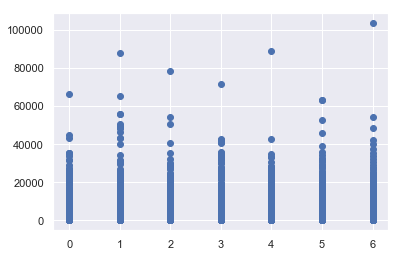

In [13]:
plt.scatter(data_day['Timestamp'], data_day['Favorites'])

In [14]:
data_ts = data.copy()
data_ts.set_index('Timestamp', inplace=True)
data_ts.index

DatetimeIndex(['2019-03-26 17:14:21', '2019-03-26 17:05:17',
               '2019-03-26 16:34:22', '2019-03-25 03:10:38',
               '2019-03-25 00:40:52', '2019-03-23 21:11:49',
               '2019-03-23 20:50:49', '2019-03-23 00:41:01',
               '2019-03-22 22:47:49', '2019-03-21 01:59:30',
               ...
               '2015-07-02 05:30:14', '2015-07-02 02:44:27',
               '2015-07-02 02:31:34', '2015-07-02 02:31:08',
               '2015-07-02 02:16:49', '2015-07-02 02:06:40',
               '2015-07-01 22:52:26', '2015-07-01 08:46:52',
               '2015-06-30 17:20:51', '2015-06-30 17:15:19'],
              dtype='datetime64[ns]', name='Timestamp', length=2452, freq=None)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


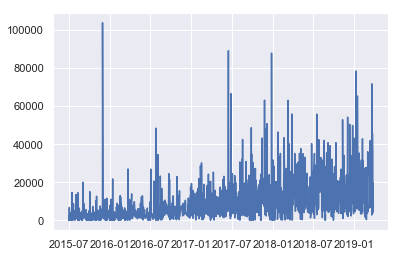

In [15]:
ts = data_ts['Favorites']
plt.plot(ts)

In [16]:
#favorites and retweets
X = data.drop(['Favorites', 'Retweets', 'Full_Text'], axis=1)
time_0 = X['Timestamp'][0]
time_since = []
for time in X['Timestamp']:
    time_since.append((time_0 - time).total_seconds())
X['Timestamp'] = time_since
y_favorites = data['Favorites']
y_retweets = data['Retweets']

In [17]:
X_train_fav, X_test_fav, y_train_fav, y_test_fav = train_test_split(X, y_favorites, test_size = 0.2, random_state = 0)
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(X, y_retweets, test_size = 0.2, random_state = 0)

In [18]:
logreg_fav = LogisticRegression()
logreg_fav.fit(X_train_fav, y_train_fav)
y_pred_fav = logreg_fav.predict(X_test_fav)
print(metrics.accuracy_score(y_test_fav, y_pred_fav))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


In [19]:
logreg_ret = LogisticRegression()
logreg_ret.fit(X_train_ret, y_train_ret)
y_pred_ret = logreg_ret.predict(X_test_ret)
print(metrics.accuracy_score(y_test_ret, y_pred_ret))
#Logistic Regression was predictably unsuccessful. We did, however, get an important takeaway: time_since

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.004073319755600814


In [20]:
data_second = data.copy()
data_second['Timestamp'] = time_since
data_second

,Timestamp,Full_Text,Favorites,Retweets,Sentiment
0,0.0,"""Feel as though ive evolved beyond the need fo...",3980,434,-2.000000e-01
1,544.0,it fucking Sucks when a store sells me shit\nh...,19607,2125,-2.500000e-01
2,2399.0,you look like the tomb raider lady Lol\nMar 22...,7948,759,5.428571e-01
3,137023.0,https://t.co/YriJp9Nwsx,4889,473,0.000000e+00
4,146009.0,"saying ""WOW"" out loud watching youtube guy's u...",35201,4527,0.000000e+00
5,244952.0,there`s no job harder than that of the Media P...,45697,7039,2.750000e-01
6,246212.0,oh forgive me for forgetting that youre too go...,14331,1383,7.000000e-01
7,318800.0,when the earths Magnetic Poles flip and everyo...,5796,509,3.700743e-17
8,325592.0,ME: I love shit that is Dunning-Kruger\nNY Tim...,4661,383,4.250000e-01
9,486891.0,https://t.co/MfB5ySwNlp,10358,1020,0.000000e+00


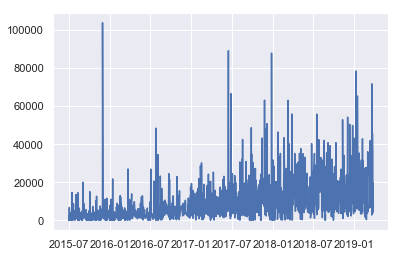

In [21]:
plt.plot(data['Timestamp'], data['Favorites'])
plt.show()

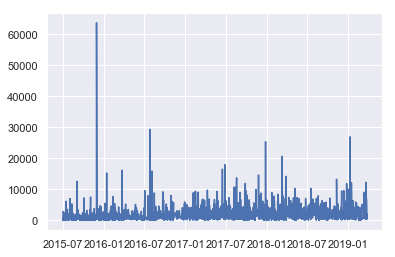

In [22]:
plt.plot(data['Timestamp'], data['Retweets'])
plt.show()